In [1]:
import os
import pandas as pd
import numpy as np

from fontTools.ttLib import TTFont
from fontTools.pens.svgPathPen import SVGPathPen

import svgpath2mpl
from svgpath2mpl import parse_path

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

In [2]:
fdir = '../ff/'
os.listdir(fdir)

['ff2.sfd', 'ff_c1.sfd', 'ff_c1.ttf', 'ff1.sfd', 'ff1.ttf', 'ff2.ttf']

In [3]:
fnam = 'ff_c1.ttf'
font = TTFont(fdir+fnam)

In [4]:
# cmap = font.getBestCmap()
# cmap

In [5]:
cdict = {
    #symbols
    '!': 'exclam',
    '"': 'quotedbl',
    '$': 'dollar',
    '%': 'percent',
    "'": 'quotesingle',
    '(': 'parenleft',
    ')': 'parenright',
    '*': 'asterisk',
    ',': 'comma',
    '-': 'hyphen',
    '.': 'period',
    ':': 'colon',
    ';': 'semicolon',
    '<': 'less',
    '=': 'equal',
    '>': 'greater',
    '?': 'question',
    '@': 'at',
    #numbers
    '0': 'zero',
    '1': 'one',
    '2': 'two',
    '3': 'three',
    '4': 'four',
    '5': 'five',
    '6': 'six',
    '7': 'seven',
    '8': 'eight',
    '9': 'nine',
    #grave
    'À':'Agrave',
    'È':'Egrave',
    'Ì':'Igrave',
    'Ò':'Ograve',
    'Ù':'Ugrave',
    'à':'agrave',
    'è':'egrave',
    'ì':'igrave',
    'ò':'ograve',
    'ù':'ugrave',
    #acute
    'Á':'Aacute',
    'É':'Eacute',
    'Í':'Iacute',
    'Ó':'Oacute',
    'Ú':'Uacute',
    'á':'aacute',
    'é':'eacute',
    'í':'iacute',
    'ó':'oacute',
    'ú':'uacute',
    #macron
    'Ā':'Amacron',
    'Ē':'Emacron',
    'Ī':'Imacron',
    'Ō':'Omacron',
    'Ū':'Umacron',
    'ā':'amacron',
    'ē':'emacron',
    'ī':'imacron',
    'ō':'omacron',
    'ū':'umacron',
    #breve
    'Ă':'Abreve',
    'Ĕ':'Ebreve',
    'Ĭ':'Ibreve',
    'Ŏ':'Obreve',
    'Ŭ':'Ubreve',
    'ǎ':'abreve',
    'ě':'ebreve',
    'ǐ':'ibreve',
    'ǒ':'obreve',
    'ǔ':'ubreve',
}
#cdict['ū']
clist = list(cdict.keys())

In [6]:
txts = [
#
# ~~~~~~~~~~
# cover
"心之所向",
#
# ~~~~~~~~~~
#
#
# ~~~~~~~~~~
# pg01
#
"心之所向",
"Heart's direction",
#
# ~~~~~~~~~~
#
#
# ~~~~~~~~~~
# pg02
"二零二三年",
"Èr líng èrsān nián",
"2023",
#
"圈出版社",
"Quān chūbǎn shè",
"Circle Press",
#
# ~~~~~~~~~~
#
#
# ~~~~~~~~~~
# pg03
#
"(Two strangers,",
"meeting at a station)",
#
"对不起，",
"duìbùqǐ,",
"您能告诉我",
"nín néng gàosu wǒ",
"这是哪一班火车吗？",
"zhè shì nǎ yībān huǒchē ma?",
#
"Excuse me," ,
"can you tell me",
"which train this is?",
#
# ~~~~~~~~~~
#
#
# ~~~~~~~~~~
# pg04
#
"嗯，",
"ēn,",
"这是D2252次列车。",
"zhè shì D2252 cì lièchē.",
"它去往杭州。",
"Tā qùwǎng Hángzhōu.",
#
"Hmm,",
"this is the D2252 train.",
"It goes to Hangzhou.",
#
"谢谢！",
"xièxiè!",
"您是哪里人？",
"Nín shì nǎlǐ rén?",
#
"Thank you!" ,
"Where are you from?",
#
# pg05
#
"我是上海人。",
"wǒ shì Shànghǎi rén.",
"你呢？",
"Nǐ ne?",
#
"I'm from Shanghai.",
"And you?",
#
# ~~~~~~~~~~
#
#
# ~~~~~~~~~~
# pg06
#
"我是南京人。",
"wǒ shì Nánjīng rén.",
"我来这里是因为",
"Wǒ lái zhèlǐ shì yīnwèi",
"我有朋友在杭州。",
"wǒ yǒu péngyou zài Hángzhōu.",
#
"I'm from Nanjing.",
"I'm here because",
"I have a friend in Hangzhou.",
#
"哦，真的吗？",
"ó, zhēn de ma?",
"你们是多久以前认识的？",
"Nǐmen shì duōjiǔ yǐqián rènshí de?",
#
"Oh, really?",
"How long have you known each other?",
#
# ~~~~~~~~~~
#
#
# ~~~~~~~~~~
# pg07
#
"我们是在大学认识的。",
"wǒmen shì zài dàxué rènshí de.",
"已经有十年了。",
"Yǐjīng yǒu shí nián le.",
#
"We met in university.",
"It's been ten years.",
#
# ~~~~~~~~~~
#
#
# ~~~~~~~~~~
# pg08
#
"哇，真的吗？",
"wā, zhēn de ma?",
"时间过得真快啊！",
"Shíjiān guò de zhēn kuài a!",
#
"Wow, really?",
"Time passes so quickly!",
#
# ~~~~~~~~~~
]

In [7]:
csca = {
    "engl": 1,
    "punc": 1,
    "piny": 1,
    "hanz": 1.75,
}
csca["engl"]

1

In [8]:
'。'.encode("unicode_escape")

b'\\u3002'

In [9]:
tcs = []
ics = []
for x in range(len(txts)):
    txt = txts[x]
    tc = []
    ic = []
    for t in range(len(txt)):
        char = txt[t]
        charr = char.encode("unicode_escape")
        charr = str(charr)
        ctyp = ""
        if len(charr) <5:
            if char in clist: # English
                charrie = cdict[char]
                ctyp = "engl"
            else: # Common punctuation
                charrie = char
                ctyp = "punc"
        else:
            if char in clist: # Pinyin symbols
                charrie = cdict[char]                    
                ctyp = "piny"
            else: # Chinese characters
                charr = charr.replace("b'\\\\","'\\\\")
                charr = charr.replace("'","")
                charr = charr.replace("\\\\","")
                charr = charr.upper()
                charrie = charr.replace("U","uni")                  
                ctyp = "hanz"
        tc.append(csca[ctyp])
        ic.append(charrie)
    tcs.append(tc)
    ics.append(ic)

In [10]:
sum(tcs[1])

7.0

0


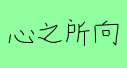

1


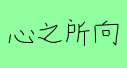

2


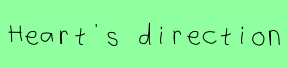

3


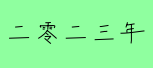

4


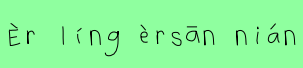

5


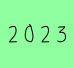

6


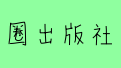

7


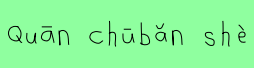

8


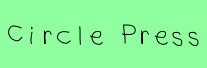

9


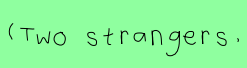

10


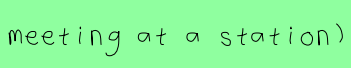

11


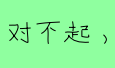

12


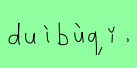

13


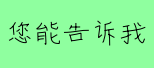

14


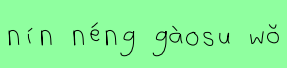

15


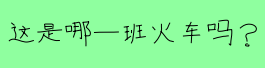

16


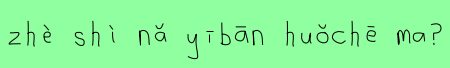

17


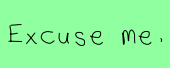

18


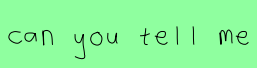

19


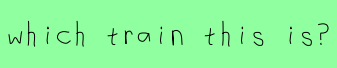

20


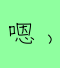

21


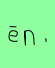

22


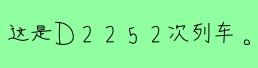

23


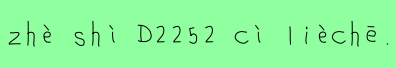

24


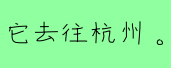

25


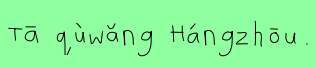

26


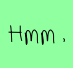

27


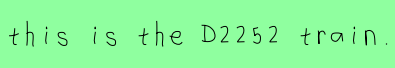

28


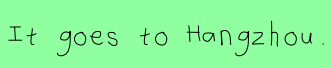

29


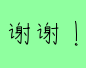

30


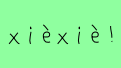

31


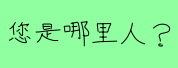

32


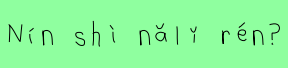

33


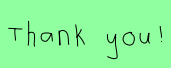

34


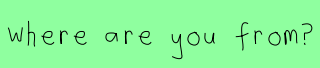

35


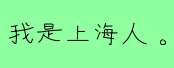

36


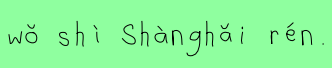

37


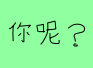

38


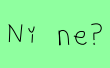

39


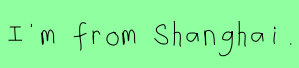

40


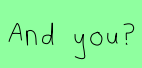

41


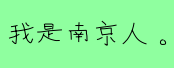

42


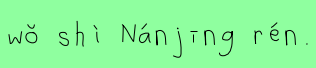

43


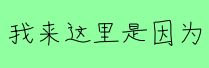

44


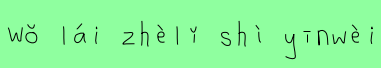

45


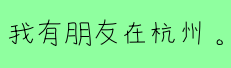

46


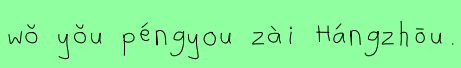

47


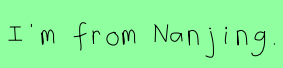

48


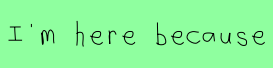

49


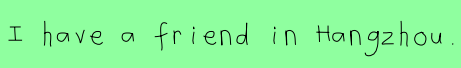

50


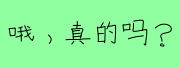

51


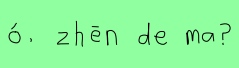

52


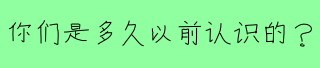

53


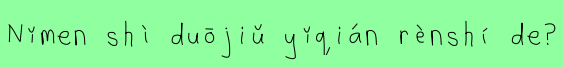

54


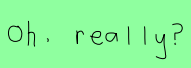

55


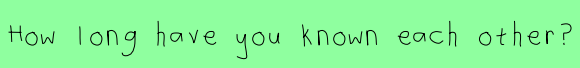

56


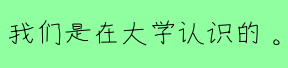

57


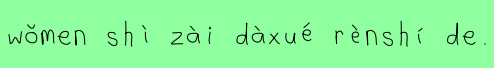

58


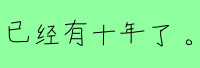

59


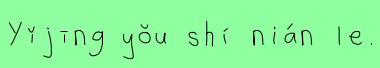

60


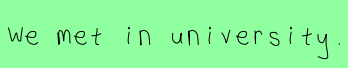

61


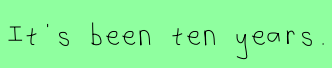

62


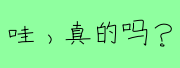

63


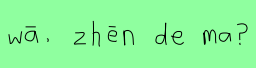

64


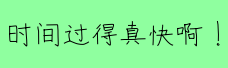

65


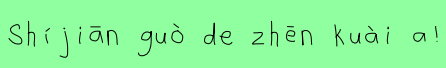

66


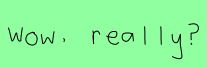

67


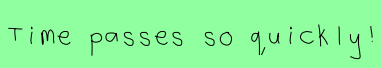

In [11]:
for x in range(len(txts)):
    if x >= 0: # use for subset
        #x = 14
        print(x)
        txt = txts[x]
        # txt='Nǐ hǎo, nǐ zěnme yàng'
        # txt
        sca = 1
        gpx = 10
        gpy = 10
#         print("len:")
#         print(len(txt))
#         print(sum(tcs[x]))
        fig, axs = plt.subplots(1, 
                                len(txt), 
                                figsize=((sum(tcs[x])*sca)/4, sca))
        for t in range(len(txt)):
            char = txt[t]
            charrie = ics[x][t]
            #
            if char != ' ': # Handle spaces
                glyphSet = font.getGlyphSet()
                svgpen = SVGPathPen(glyphSet)
                glyph = glyphSet[charrie]
                #
                glyph.draw(svgpen)
                cpath = svgpen.getCommands()
                cpath = cpath.replace('Z','') # replace 'Z' = 'closepath'
                #cpath
                #
                pcpath = svgpath2mpl.parse_path(cpath)
                vv = pcpath.vertices
                vdf = pd.DataFrame(vv)
                vxmi = vdf[0].min()
                vxma = vdf[0].max()
                vymi = vdf[1].min()
                vyma = vdf[1].max()
                #
                #
                patch = mpl.patches.PathPatch(
                    pcpath, 
                    facecolor='none', 
                    edgecolor='black', 
                    linewidth=1)
                patch.set_transform(axs[t].transData)
                axs[t].add_patch(patch)
                axs[t].set_aspect(1)
                axs[t].axis("off")
                axs[t].set_xticklabels([])
                axs[t].set_yticklabels([])
                axs[t].set_xlim([vxmi-50, vxma+50])
                axs[t].set_ylim([-350, 1100])
            else: # space character
                axs[t].set_aspect(1)
                axs[t].axis("off")
                axs[t].set_xlim([0, 400])
                axs[t].set_ylim([-350, 1100])
        #
        fig.subplots_adjust(left=0, wspace=0, hspace=0)
        fig.patch.set_facecolor('xkcd:mint green')
        plt.savefig("out/phidia2/line_"+str(x)+".svg")
        plt.show()

In [12]:
# print(x)
# print(txts[x])

In [13]:
#txts[15]